<a href="https://colab.research.google.com/github/KazuyaHoribe/AdaptiveParticleLenia/blob/main/analysis_particle_lenia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as pl

## energy analysis

In [ ]:
#@title (loading data)
logs_list = []
stories0_list = []
stories1_list = []
sigma = np.arange(0.01, 0.23, 0.02)
mu = np.arange(0.1, 1.2, 0.1)
for j in mu:
  for i in sigma:
      file_path_logs = f"/content/drive/MyDrive/alife2023/mu_g/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/logs.npy"
      log = np.load(file_path_logs)
      logs_list.append(log)

      #file_path_stories0 = f"/content/drive/MyDrive/alife2023/mu_g/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/stories0.npy"
      #story0 = np.load(file_path_stories0)
      #stories0_list.append(story0)

      #file_path_stories1 = f"/content/drive/MyDrive/alife2023/mu_g/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/stories1.npy"
      #story1 = np.load(file_path_stories1)
      #stories1_list.append(story1)
print(sigma)
print(mu)

print(len(logs_list))
print(logs_list[0].shape)
print(logs_list[0][:,-1].shape)
logs_list = np.array(logs_list)
print(logs_list.shape)
print(logs_list[0].shape)
print(logs_list[:,:,-1].shape)

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
121
(100, 10000)
(100,)
(121, 100, 10000)
(100, 10000)
(121, 100)


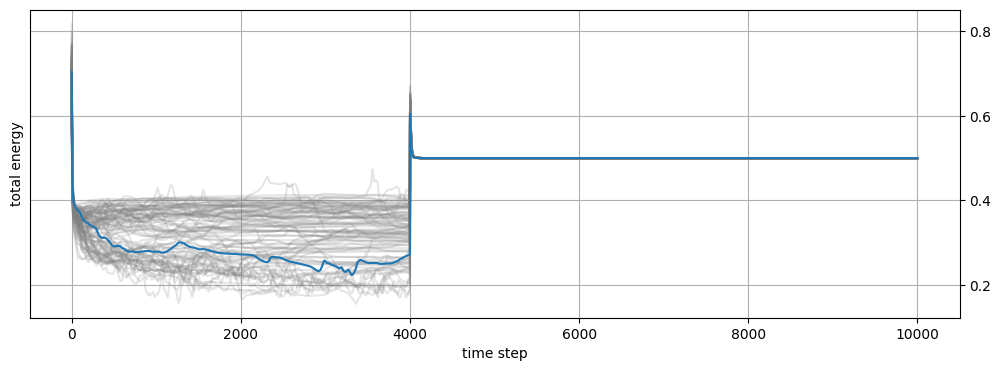

In [ ]:
#@title (time evolution)
logs= logs_list[114]
pl.figure(figsize=(12, 4))
pl.gca().yaxis.tick_right()
pl.tick_params(labelright=True)
#pl.title('100 simulations')
pl.plot(logs.T, alpha=0.2, color='grey');
pl.xlabel('time step')
pl.ylabel('total energy')
pl.rcParams["font.size"] = 18
for i in [8]:
#for i in [8, 17, 52, 81, 30, 2, 29, 43]:
  e = logs[i]
  pl.plot(e)
  #pl.legend()
folder_path = '/content/drive/MyDrive/alife2023/mu_g/mu_g1.1_sigma_g0.09_c_rep1.0'
pl.savefig(folder_path + '/total_energy8.png', bbox_inches='tight', pad_inches=0)
pl.grid()
pl.show()

(121,)


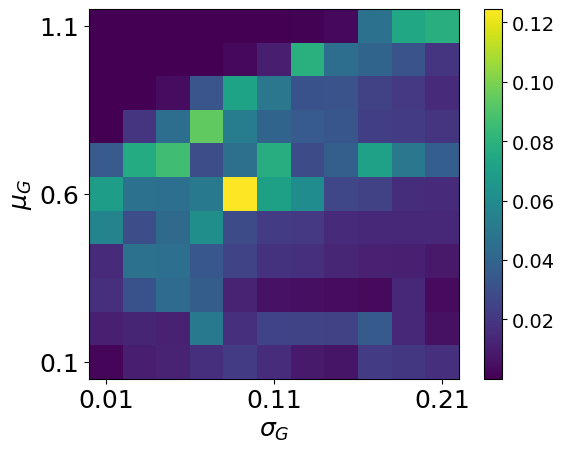

In [ ]:
#@title (std)
std = np.std(logs_list[:,:,-1],axis=1)
print(std.shape)
std = np.reshape(std,(11,11))
std = std[::-1, :]

fig, ax = pl.subplots()
im = ax.imshow(std, cmap='viridis')
x = np.arange(0.01,0.23, 0.02)
y = np.arange(1.1, 0.0, -0.1)

# 軸の値を間引く
xticks = np.arange(0, len(x),5)
yticks = np.arange(0, len(y),5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(x[xticks], 2))
ax.set_yticklabels(np.round(y[yticks], 2))
ax.set_xlabel(r'$\sigma_G$')
ax.set_ylabel(r'$\mu_G$')
ax.grid(False)
pl.rcParams["font.size"] = 14

pl.colorbar(im)
pl.savefig('/content/drive/MyDrive/alife2023/phse_space.png', bbox_inches='tight', pad_inches=0.1)
pl.show()


(121, 100, 10000)
(121, 100, 2000)
(121, 100)
(121,)


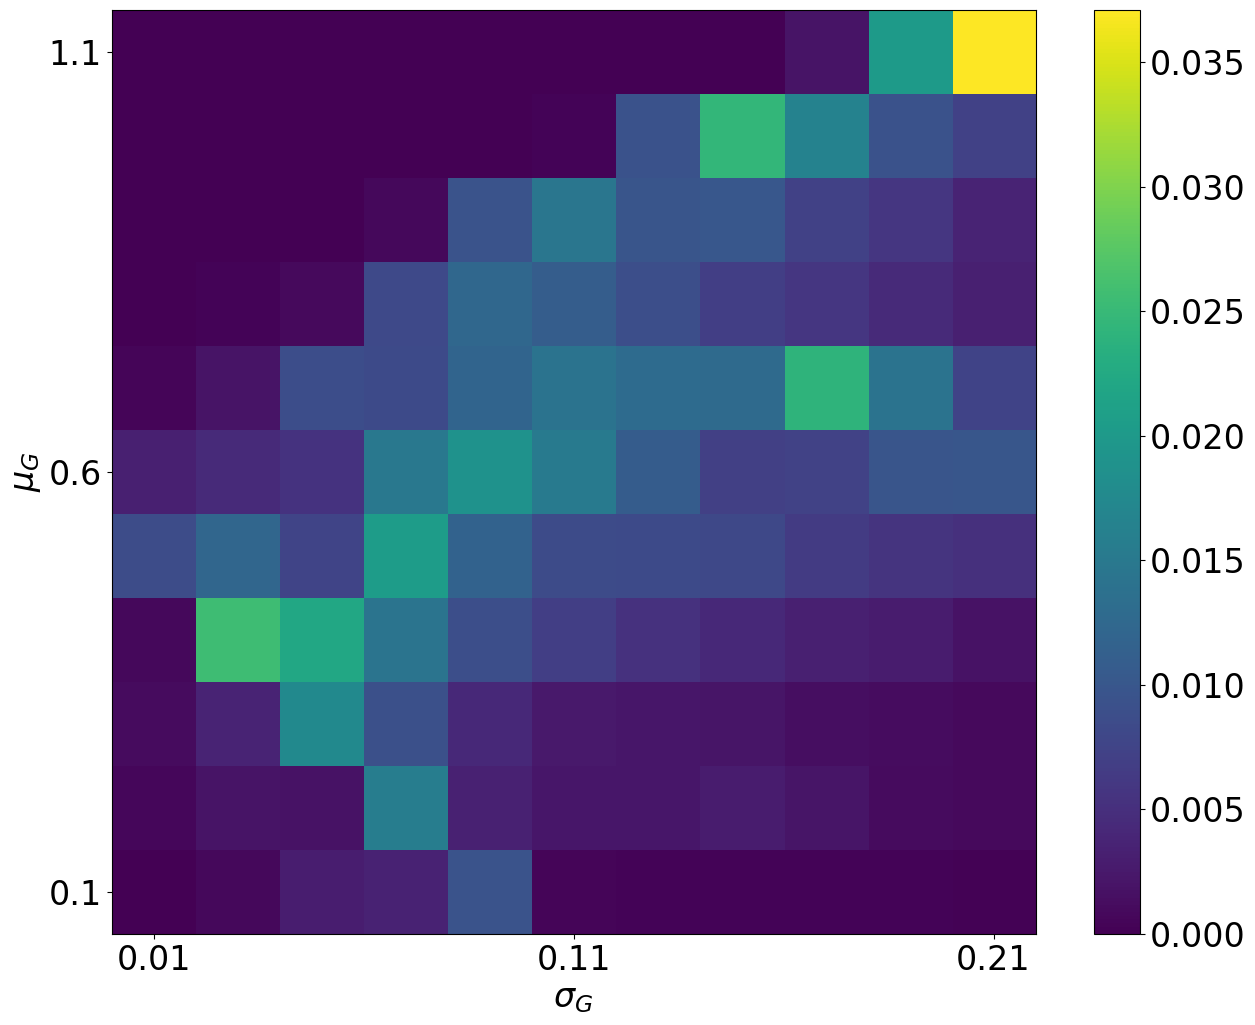

In [ ]:
#@title (time instability)
print(logs_list.shape)
print(logs_list[:,:,-2001:-1].shape)
std = np.std(logs_list[:,:,-2001:-1],axis=2)
print(std.shape)
mean = np.mean(std[:,:],axis=1)
print(mean.shape)
mean = np.reshape(mean,(11,11))
mean = mean[::-1, :]

fig, ax = pl.subplots(figsize=(15,12))
im = ax.imshow(mean, cmap='viridis')
x = np.arange(0.01,0.23, 0.02)
y = np.arange(1.1, 0.0, -0.1)

# 軸の値を間引く
xticks = np.arange(0, len(x),5)
yticks = np.arange(0, len(y),5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(x[xticks], 2))
ax.set_yticklabels(np.round(y[yticks], 2))
ax.set_xlabel(r'$\sigma_G$')
ax.set_ylabel(r'$\mu_G$')
ax.grid(False)
pl.rcParams["font.size"] = 24

pl.colorbar(im)
pl.savefig('/content/drive/MyDrive/alife2023/time_instability.png', bbox_inches='tight', pad_inches=0.1)
pl.show()


(121, 100, 10000)
(121, 100, 2000)
(121, 100)
(121,)


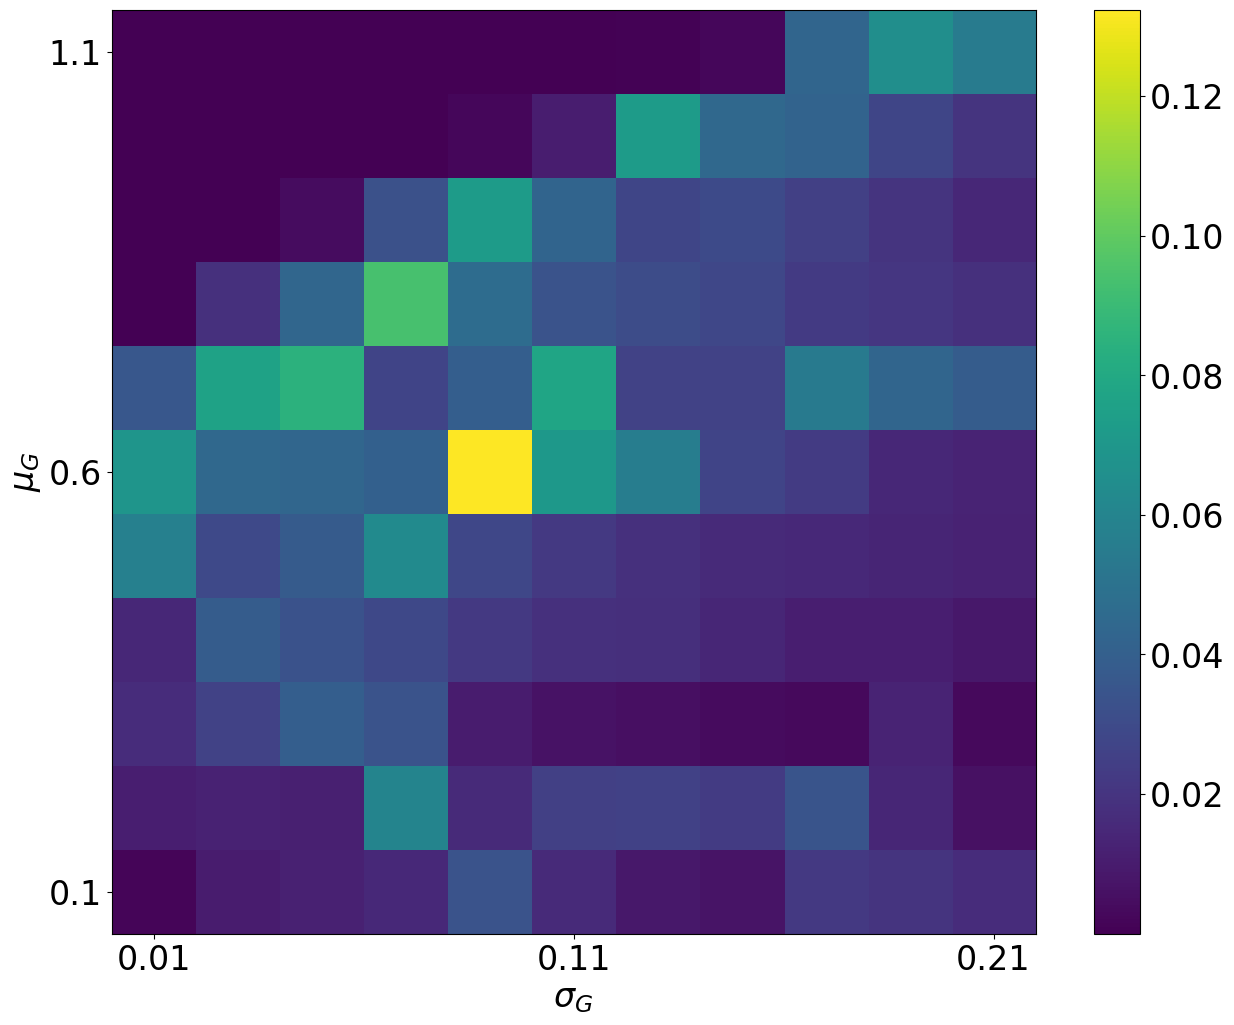

In [ ]:
#@title (various for energy)
print(logs_list.shape)
print(logs_list[:,:,-2001:-1].shape)
mean = np.mean(logs_list[:,:,-2001:-1],axis=2)
print(mean.shape)
std = np.std(mean[:,:],axis=1)
print(std.shape)
std = np.reshape(std,(11,11))
std = std[::-1, :]

fig, ax = pl.subplots(figsize=(15,12))
im = ax.imshow(std, cmap='viridis')
x = np.arange(0.01,0.23, 0.02)
y = np.arange(1.1, 0.0, -0.1)

# 軸の値を間引く
xticks = np.arange(0, len(x),5)
yticks = np.arange(0, len(y),5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(x[xticks], 2))
ax.set_yticklabels(np.round(y[yticks], 2))
ax.set_xlabel(r'$\sigma_G$')
ax.set_ylabel(r'$\mu_G$')
ax.grid(False)
pl.rcParams["font.size"] = 24

pl.colorbar(im)
pl.savefig('/content/drive/MyDrive/alife2023/various for energy.png', bbox_inches='tight', pad_inches=0.1)
pl.show()


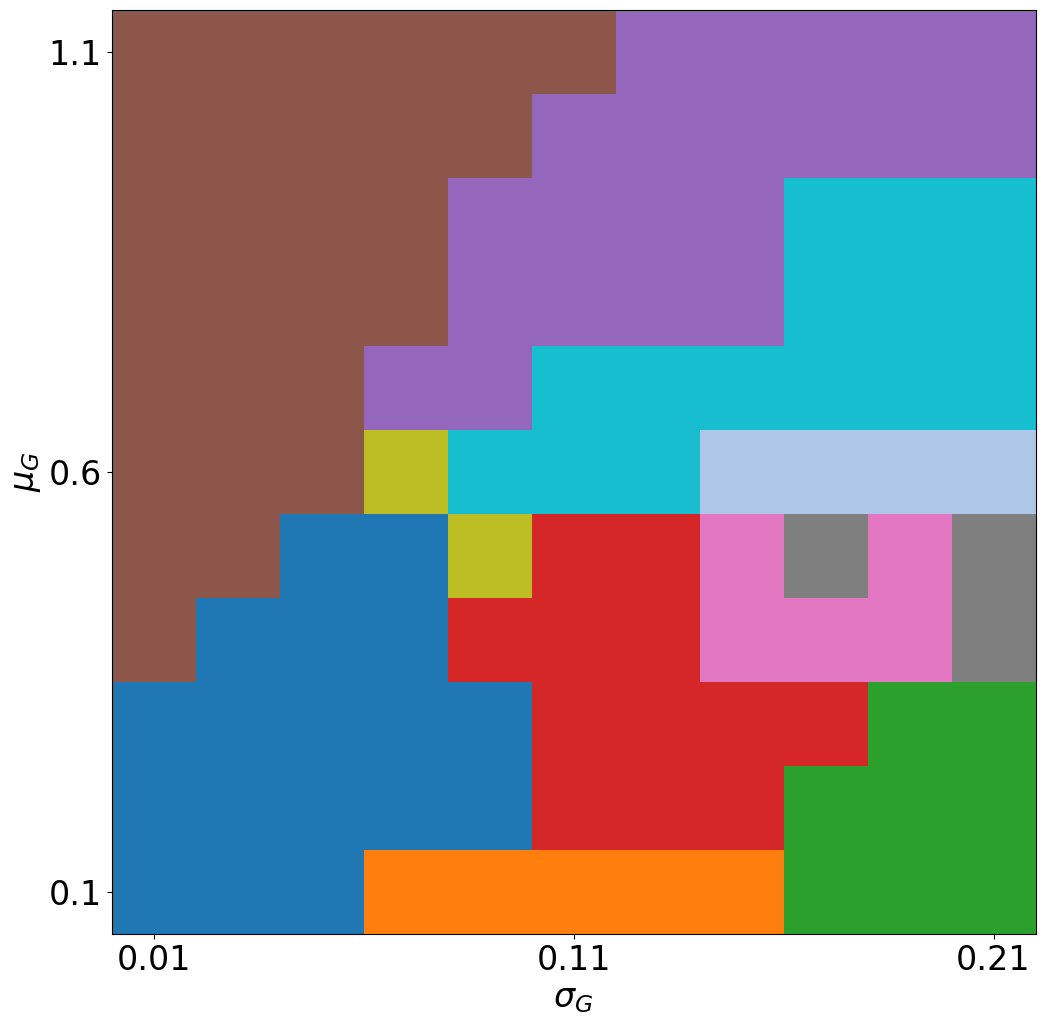

In [ ]:
#@title (phase space for pattern)
pattern = np.array([[1,1,1,2,2,2,2,2,3,3,3],
                    [1,1,1,1,1,4,4,4,3,3,3],
                    [1,1,1,1,1,4,4,4,4,3,3],
                    [6,1,1,1,4,4,4,7,7,7,8],
                    [6,6,1,1,9,4,4,7,8,7,8],
                    [6,6,6,9,10,10,10,11,11,11,11],
                    [6,6,6,5,5,10,10,10,10,10,10],
                    [6,6,6,6,5,5,5,5,10,10,10],
                    [6,6,6,6,5,5,5,5,10,10,10],
                    [6,6,6,6,6,5,5,5,5,5,5],
                    [6,6,6,6,6,6,5,5,5,5,5]])
pattern = pattern[::-1, :]

import matplotlib.colors as colors
c = np.array([
    [31, 119, 180],   # Blue
    [255, 127, 14],   # Orange
    [44, 160, 44],    # Green
    [214, 39, 40],    # Red
    [148, 103, 189],  # Purple
    [140, 86, 75],    # Brown
    [227, 119, 194],  # Pink
    [127, 127, 127],  # Gray
    [188, 189, 34],   # Yellow green
    [23, 190, 207],   # P
    [174, 199, 232],  # Light blue
    #[255, 187, 120],  # Light orange
]) / 255.0  # 0.0-1.0の範囲にスケーリング

# カラーマップを作成
cmap = colors.ListedColormap(c, name='my12colors')

fig, ax = pl.subplots(figsize=(15,12))
im = ax.imshow(pattern, cmap= cmap)
x = np.arange(0.01,0.23, 0.02)
y = np.arange(1.1, 0.0, -0.1)

# 軸の値を間引く
xticks = np.arange(0, len(x),5)
yticks = np.arange(0, len(y),5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(x[xticks], 2))
ax.set_yticklabels(np.round(y[yticks], 2))
ax.set_xlabel(r'$\sigma_G$')
ax.set_ylabel(r'$\mu_G$')
ax.grid(False)
pl.rcParams["font.size"] = 50

#pl.colorbar(im)
pl.savefig('/content/drive/MyDrive/alife2023/pattern.png', bbox_inches='tight', pad_inches=0.1)
pl.show()


## pattern analysis

In [ ]:
#@title (imports & utils)
import io
import base64
import time
from functools import partial
from typing import NamedTuple
from collections import namedtuple
import subprocess

import PIL
import numpy as np
import matplotlib.pylab as pl

from IPython.display import display, Image, HTML, clear_output
import ipywidgets as widgets

import jax
import jax.numpy as jp

import random

def np2pil(a):
  if a.dtype in [np.float32, np.float64]:
    a = np.uint8(np.clip(a, 0, 1)*255)
  return PIL.Image.fromarray(a)

def imwrite(f, a, fmt=None):
  a = np.asarray(a)
  if isinstance(f, str):
    fmt = f.rsplit('.', 1)[-1].lower()
    if fmt == 'jpg':
      fmt = 'jpeg'
    f = open(f, 'wb')
  np2pil(a).save(f, fmt, quality=95)

def imencode(a, fmt='jpeg'):
  a = np.asarray(a)
  if len(a.shape) == 3 and a.shape[-1] == 4:
    fmt = 'png'
  f = io.BytesIO()
  imwrite(f, a, fmt)
  return f.getvalue()

def imshow(a, fmt='jpeg', display=display):
  return display(Image(data=imencode(a, fmt)))

def grab_plot(close=True):
  """Return the current Matplotlib figure as an image"""
  fig = pl.gcf()
  fig.canvas.draw()
  img = np.array(fig.canvas.renderer._renderer)
  a = np.float32(img[..., 3:]/255.0)
  img = np.uint8(255*(1.0-a) + img[...,:3] * a)  # alpha
  if close:
    pl.close()
  return img

def show_videofile(fn):
  b64 = base64.b64encode(open(fn, 'rb').read()).decode('utf8')
  s = f'''<video controls loop>
 <source src="data:video/mp4;base64,{b64}" type="video/mp4">
 Your browser does not support the video tag.</video>'''
  display(HTML(s))

class VideoWriter:
  def __init__(self, filename='_tmp.mp4', fps=30.0, show_on_finish=True):
    self.ffmpeg = None
    self.filename = filename
    self.fps = fps
    self.view = widgets.Output()
    self.last_preview_time = 0.0
    self.frame_count = 0
    self.show_on_finish = show_on_finish
    display(self.view)

  def add(self, img):
    img = np.asarray(img)
    h, w = img.shape[:2]
    if self.ffmpeg is None:
      self.ffmpeg = self._open(w, h)
    if img.dtype in [np.float32, np.float64]:
      img = np.uint8(img.clip(0, 1)*255)
    if len(img.shape) == 2:
      img = np.repeat(img[..., None], 3, -1)
    self.ffmpeg.stdin.write(img.tobytes())
    t = time.time()
    self.frame_count += 1
    if self.view and t-self.last_preview_time > 1.0:
       self.last_preview_time = t
       with self.view:
         clear_output(wait=True)
         imshow(img)
         print(self.frame_count)

  def __call__(self, img):
    return self.add(img)

  def _open(self, w, h):
    cmd = f'''ffmpeg -y -f rawvideo -vcodec rawvideo -s {w}x{h}
      -pix_fmt rgb24 -r {self.fps} -i - -pix_fmt yuv420p
      -c:v libx264 -crf 20 {self.filename}'''.split()
    return subprocess.Popen(cmd, stdin=subprocess.PIPE, stderr=subprocess.PIPE)

  def close(self):
    if self.ffmpeg:
        self.ffmpeg.stdin.close()
        self.ffmpeg.wait()
        self.ffmpeg = None
    if self.view:
      with self.view:
        clear_output()
      self.view.close()
      self.view = None

  def __enter__(self):
    return self

  def __exit__(self, *kw):
    self.close()
    if self.show_on_finish:
        self.show()

  def _ipython_display_(self):
    self.show()

  def show(self):
      self.close()
      show_videofile(self.filename)

# JAX utils

def vmap2(f):
  return jax.vmap(jax.vmap(f))

def norm(v, axis=-1, keepdims=False, eps=0.0):
  return jp.sqrt((v*v).sum(axis, keepdims=keepdims).clip(eps))

def normalize(v, axis=-1, eps=1e-20):
  return v/norm(v, axis, keepdims=True, eps=eps)


pl.rcParams.update({"axes.grid" : True})

In [ ]:
#@title (show_lenia)
import PIL.ImageFont, PIL.ImageDraw

def lerp(x, a, b):
  return jp.float32(a)*(1.0-x) + jp.float32(b)*x
def cmap_e(e):
  return 1.0-jp.stack([e, -e], -1).clip(0) @ jp.float32([[0.3,1,1], [1,0.3,1]])
def cmap_ug(u, g):
  vis = lerp(u[...,None], [0.1,0.1,0.3], [0.2,0.7,1.0])
  return lerp(g[...,None], vis, [1.17,0.91,0.13])

@partial(jax.jit, static_argnames=['w', 'show_UG', 'show_cmap'])
def show_lenia(params, points, extent, w=400, show_UG=False, show_cmap=True):
  xy = jp.mgrid[-1:1:w*1j, -1:1:w*1j].T*extent
  e0 = -peak_f(0.0, params.mu_g, params.sigma_g)
  f = partial(fields_f, params, points)
  fields = vmap2(f)(xy)
  r2 = jp.square(xy[...,None,:]-points).sum(-1).min(-1)
  points_mask = (r2/0.02).clip(0, 1.0)[...,None]
  vis = cmap_e(fields.E-e0) * points_mask
  if show_cmap:
    e_mean = jax.vmap(f)(points).E.mean()
    bar = np.r_[0.5:-0.5:w*1j]
    bar = cmap_e(bar) * (1.0-peak_f(bar, e_mean-e0, 0.005)[:,None])
    vis = jp.hstack([vis, bar[:,None].repeat(16, 1)])
  if show_UG:
    vis_u = cmap_ug(fields.U, fields.G)*points_mask
    if show_cmap:
      u = np.r_[1:0:w*1j]
      bar = cmap_ug(u, peak_f(u, params.mu_g, params.sigma_g))
      bar = bar[:,None].repeat(16, 1)
      vis_u = jp.hstack([bar, vis_u])
    vis = jp.hstack([vis_u, vis])
  return vis

fontpath = pl.matplotlib.get_data_path()+'/fonts/ttf/DejaVuSansMono.ttf'
pil_font = PIL.ImageFont.truetype(fontpath, size=16)

def text_overlay(img, text, pos=(20,10), color=(255,255,255)):
  img = np2pil(img)
  draw = PIL.ImageDraw.Draw(img)
  draw.text(pos, text, fill=color, font=pil_font)
  return img

def animate_lenia(params, tracks, rate=10, slow_start=0, w=600, show_UG=True,
                  name='_tmp.mp4', text=None, vid=None, bar_len=None,
                  bar_ofs=0, extent=None):
  if vid is None:
    vid = VideoWriter(fps=60, filename=name)
  if extent is None:
    extent = jp.abs(tracks).max()*1.2
  if bar_len is None:
    bar_len = len(tracks)
  for i, points in enumerate(tracks):
    if not (i<slow_start or i%rate==0):
      continue
    img = show_lenia(params, points, extent, w=w, show_UG=show_UG)
    bar = np.linspace(0, bar_len, img.shape[1])
    bar = (0.5+(bar>=i+bar_ofs)[:,None]*jp.ones(3)*0.5)[None].repeat(2, 0)
    frame = jp.vstack([img, bar])
    if text is not None:
      frame = text_overlay(frame, text)
    vid(frame)
  return vid

In [ ]:
Params = namedtuple('Params', 'mu_k sigma_k w_k mu_g sigma_g c_rep')
Fields = namedtuple('Fields', 'U G R E')

def peak_f(x, mu, sigma):
  return jp.exp(-((x-mu)/sigma)**2)

def fields_f(p: Params, points, x):
  r = jp.sqrt(jp.square(x-points).sum(-1).clip(1e-10))
  U = peak_f(r, p.mu_k, p.sigma_k).sum()*p.w_k
  G = peak_f(U, p.mu_g, p.sigma_g)
  R = p.c_rep/2 * ((1.0-r).clip(0.0)**2).sum()
  return Fields(U, G, R, E=R-G)

def motion_f(params, points):
  grad_E = jax.grad(lambda x : fields_f(params, points, x).E)
  return -jax.vmap(grad_E)(points)

In [ ]:
file_path_stories1 = f"/content/drive/MyDrive/alife2023/mu_g/mu_g0.3_sigma_g0.07_c_rep1.0/stories1.npy"
story1 = np.load(file_path_stories1)
story1[0].shape

(6000, 200, 2)

In [ ]:
params = Params(mu_k=4.0, sigma_k=1.0, w_k=0.022, mu_g=0.3, sigma_g=0.07, c_rep=1.0)
#j = 0.1
#i = 0.09
#animate_lenia(params, story1[0], name= f'/content/drive/MyDrive/alife2023/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/animation.mp4')

(-0.5, 1693.5, 241.5, -0.5)

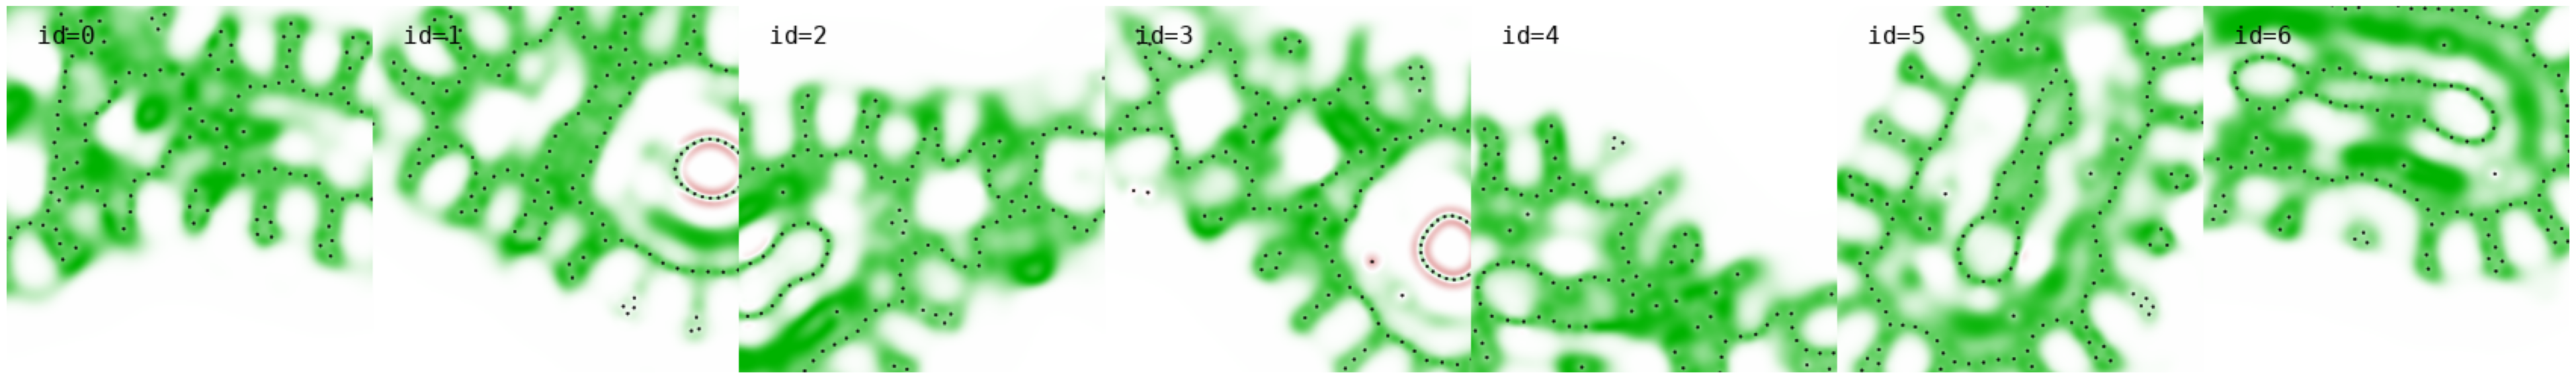

In [ ]:
fig, ax = pl.subplots(figsize=(50, 8))
#imgs0 = []
imgs1 = []
for i in [0, 1, 2, 3, 4, 5, 6]:
  #e = logs[i]
  #pl.plot(e)
  #img0 = show_lenia(params, stories0[i, -1], 11.0, w=242, show_cmap=False)
  img1 = show_lenia(params, story1[i, -1], 11.0, w=242, show_cmap=False)
  #img1 = show_lenia(params, story1[8, i], 20.0, w=600, show_cmap=False)
  #imgs0.append(np.array(text_overlay(img0, "E=%.2f"%e[2000-1], color='black')))
  #time_step = i+4001
  #imgs1.append(np.array(text_overlay(img1, "time step=%d"%time_step, color='black')))
  id = i
  imgs1.append(np.array(text_overlay(img1, "id=%d"%id, color='black')))

pl.imshow(np.hstack(imgs1))
pl.axis('off')
#pl.savefig('/content/drive/MyDrive/alife2023/mu_g/mu_g1.1_sigma_g0.09_c_rep1.0/dynamics8.png', bbox_inches='tight', pad_inches=0)

In [ ]:
file_path_stories0 = f"/content/drive/MyDrive/alife2023/mu_g/mu_g1.1_sigma_g0.09_c_rep1.0/stories0.npy"
story0 = np.load(file_path_stories0)

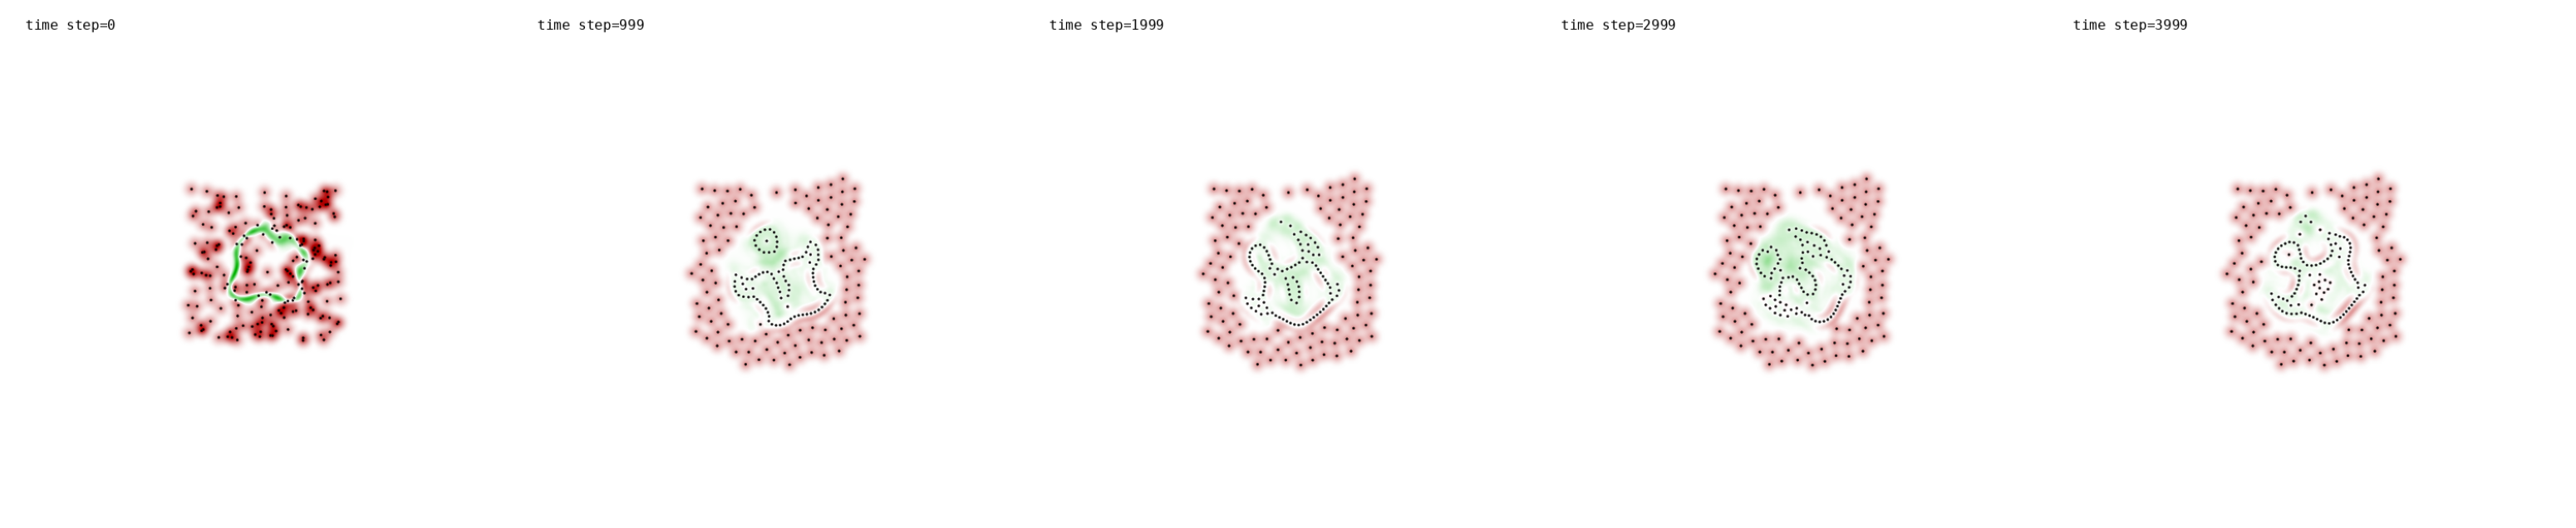

In [ ]:
fig, ax = pl.subplots(figsize=(50, 8))
#imgs0 = []
imgs0 = []
for i in [0, 999,1999, 2999, 3999]:
  #e = logs[i]
  #pl.plot(e)
  #img0 = show_lenia(params, stories0[i, -1], 11.0, w=242, show_cmap=False)
  img0 = show_lenia(params, story0[8, i], 20.0, w=600, show_cmap=False)
  #imgs0.append(np.array(text_overlay(img0, "E=%.2f"%e[2000-1], color='black')))
  time_step = i
  imgs0.append(np.array(text_overlay(img0, "time step=%d"%time_step, color='black')))

pl.imshow(np.hstack(imgs0))
pl.axis('off')
pl.savefig('/content/drive/MyDrive/alife2023/mu_g/mu_g1.1_sigma_g0.09_c_rep1.0/dynamics8_before.png', bbox_inches='tight', pad_inches=0)

In [ ]:
#@title (make_animation)
sigma = np.arange(0.01, 0.23, 0.02)
mu = np.arange(0.4, 1.2, 0.1)

for j in mu:
  for i in sigma:

      file_path = f"/content/drive/MyDrive/alife2023/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/stories1.npy"
      story1 = np.load(file_path)
      params = Params(mu_k=4.0, sigma_k=1.0, w_k=0.022, mu_g= j, sigma_g= i, c_rep=1.0)
      vid = animate_lenia(params, story1[0], name= f'/content/drive/MyDrive/alife2023/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/animation.mp4')
      vid.close()
      
    
      '''
      fig, ax = pl.subplots(figsize=(50, 8))
      imgs1 = []
      for k in [0, 999,1999, 2999, 3999, 4999, 5999]:
        img1 = show_lenia(params, story1[0,k], 20.0, w=600, show_cmap=False)
        time_step = k+4001
        imgs1.append(np.array(text_overlay(img1, "time step=%d"%time_step, color='black')))

      pl.imshow(np.hstack(imgs1))
      pl.axis('off')
      pl.savefig(f'/content/drive/MyDrive/alife2023/mu_g{j:.1f}_sigma_g{i:.2f}_c_rep1.0/dynamics.png', bbox_inches='tight', pad_inches=0)
      '''

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()